#TensorFlow

As you know, TensorFlow is a powerful library for numerical computation, particularly well suited and fine-tuned for large-scale machine learning (but you can use it for anything else that requires heavy computations). It was developed by the Google Brain team and it powers many of Google’s large-scale services, such as Google Cloud Speech, Google Photos, and Google Search. It was open sourced in November 2015, and it is now the most widely used deep learning library in the industry:1 countless projects use TensorFlow for all sorts of machine learning tasks, such as image classification, natural language processing, recommender systems, and time series forecasting.

So what does TensorFlow offer? Here’s a summary:

Its core is very similar to NumPy, but with GPU support.

It supports distributed computing (across multiple devices and servers).

It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, optimizing it (e.g., by pruning unused nodes), and running it efficiently (e.g., by automatically running independent operations in parallel).

Computation graphs can be exported to a portable format, so you can train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).



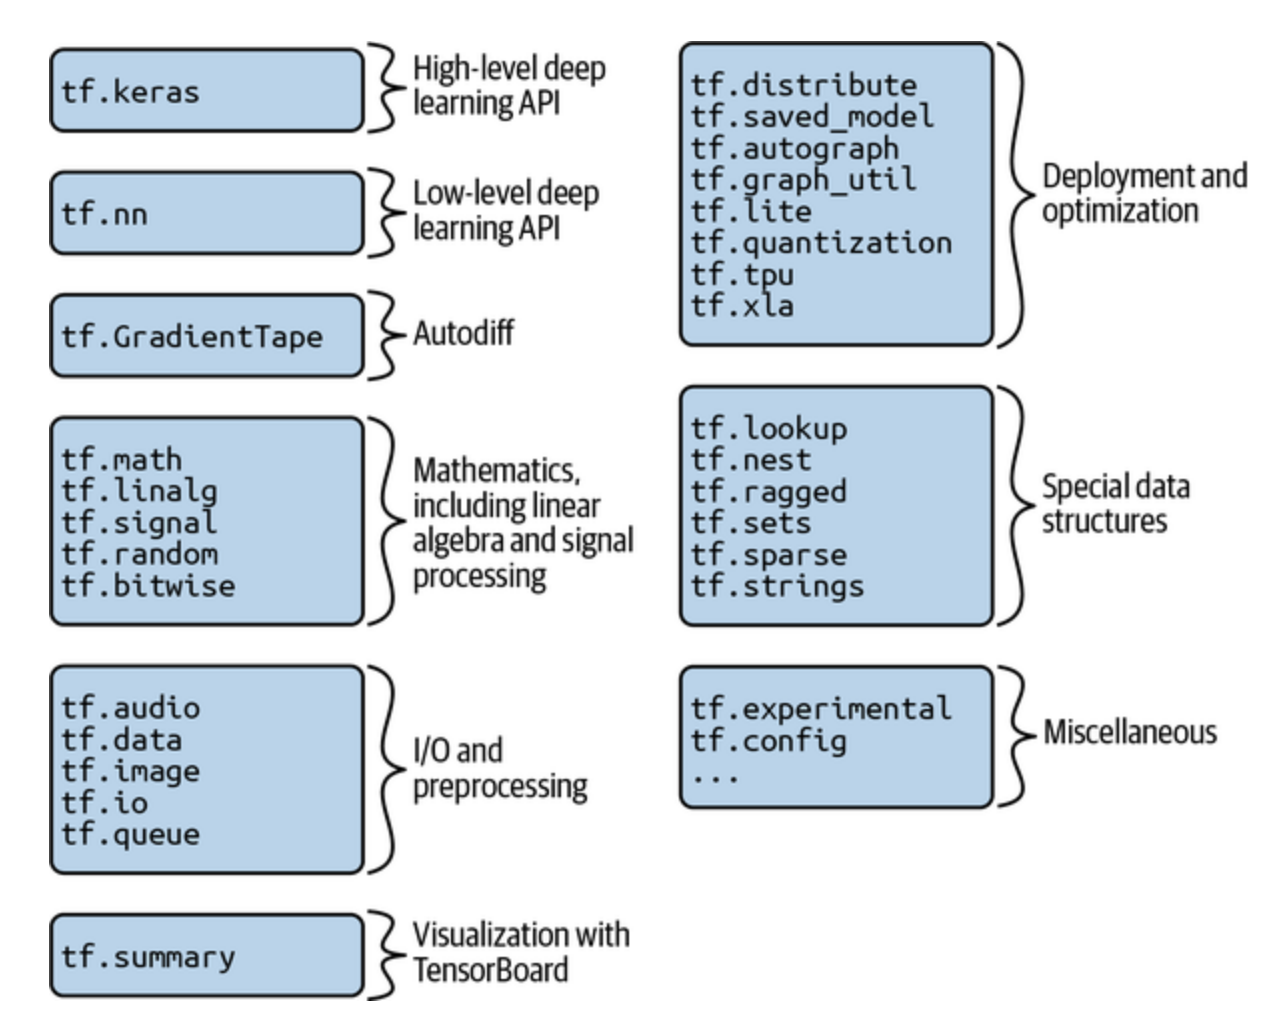

TensorFlow’s architecture is shown in Figure 12-2. Most of the time your code will use the high-level APIs (especially Keras and tf.data), but when you need more flexibility you will use the lower-level Python API, handling tensors directly. In any case, TensorFlow’s execution engine will take care of running the operations efficiently, even across multiple devices and machines if you tell it to.

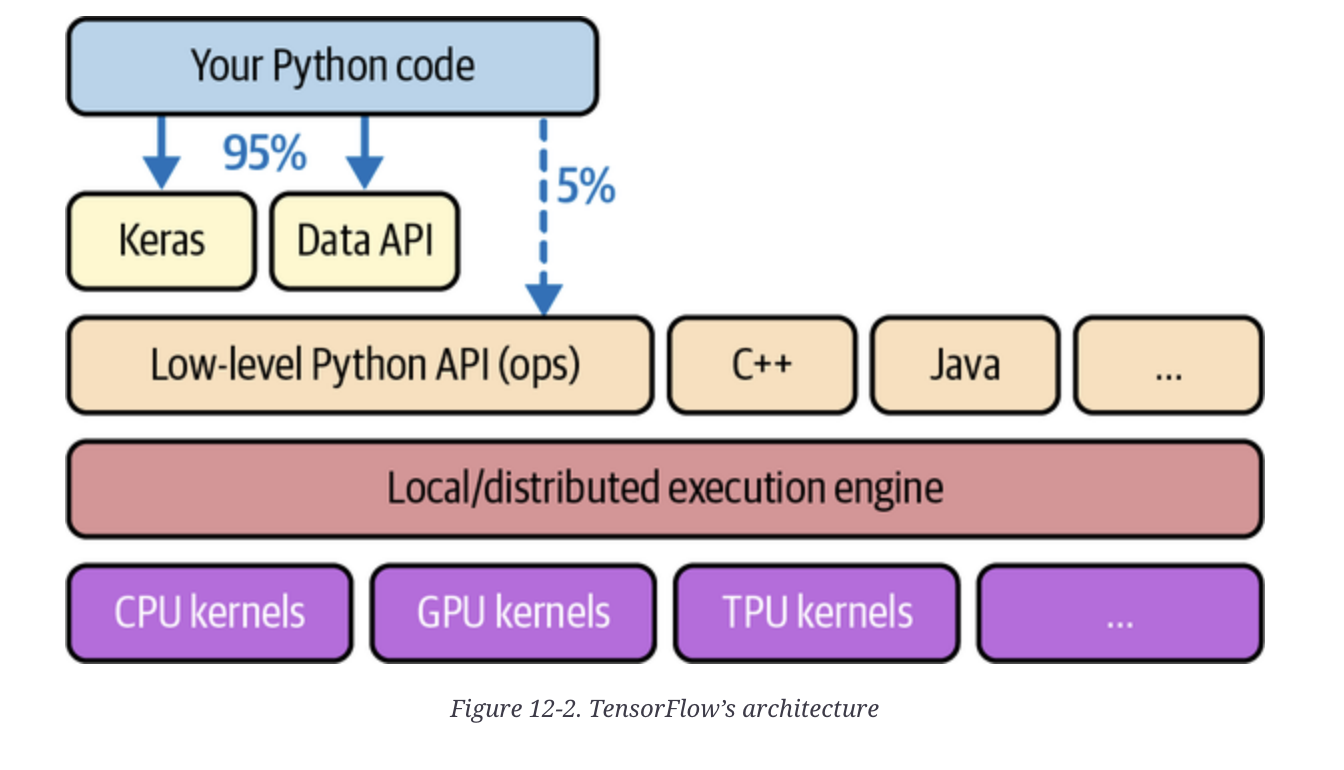

In [1]:
import tensorflow as tf


In [2]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [3]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [4]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [5]:
t2 = tf.constant(40., dtype=tf.float64)

In [8]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

- Sparse tensors (tf.SparseTensor)
Efficiently represent tensors containing mostly zeros. The tf.sparse package contains operations for sparse tensors.

- Tensor arrays (tf.TensorArray)
Are lists of tensors. They have a fixed length by default but can optionally be made extensible. All tensors they contain must have the same shape and data type.

- Ragged tensors (tf.RaggedTensor)
Represent lists of tensors, all of the same rank and data type, but with varying sizes. The dimensions along which the tensor sizes vary are called the ragged dimensions. The tf.ragged package contains operations for ragged tensors.

In [11]:
u = tf.constant([ord(c) for c in "café"])
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [13]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
r = tf.strings.unicode_decode(p, "UTF8")

r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [17]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [15]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

## Tensor Arrays

In [18]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)  # returns (and zeros out!) tf.constant([3., 10.])

#Keras's low-level API
You may still run across code that uses Keras's low-level API:

In [9]:
K = tf.keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

#Custom loss function

In [19]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

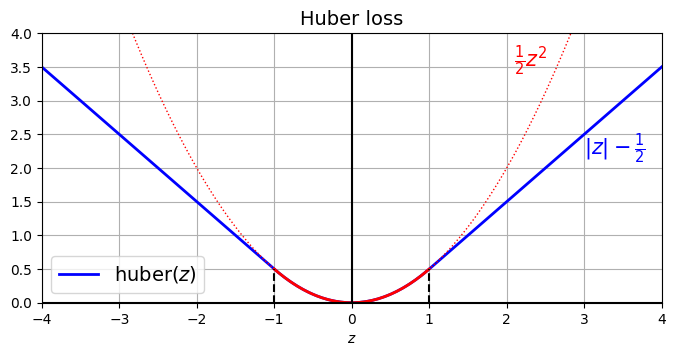

In [21]:
# extra code – shows what the Huber loss looks like

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [23]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [24]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 7s 10ms/step - loss: 0.4439 - mae: 0.7952 - val_loss: 0.3026 - val_mae: 0.6222
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2451 - mae: 0.5507 - val_loss: 0.2213 - val_mae: 0.5112


#Saving/Loading Models with Custom Objects

In [25]:
model.save("my_model_with_a_custom_loss")  # extra code – saving works fine

In [26]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss",
                                   custom_objects={"huber_fn": huber_fn})

In [27]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.1975 - mae: 0.4797 - val_loss: 0.1984 - val_mae: 0.4708
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.1794 - mae: 0.4531 - val_loss: 0.1862 - val_mae: 0.4586


#With the current implementation, any error between –1 and 1 is considered “small”. But what if you want a different threshold? One solution is to create a function that creates a configured loss function:

In [28]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [29]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [30]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1947 - mae: 0.4456 - val_loss: 0.2250 - val_mae: 0.4513
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1900 - mae: 0.4410 - val_loss: 0.2036 - val_mae: 0.4472


In [31]:
model.save("my_model_with_a_custom_loss_threshold_2")

In [32]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2",
                                   custom_objects={"huber_fn": create_huber(2.0)})

In [33]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1866 - mae: 0.4366 - val_loss: 0.1994 - val_mae: 0.4348
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1843 - mae: 0.4341 - val_loss: 0.1815 - val_mae: 0.4334


Unfortunately, when you save the model, the threshold will not be saved. This means that you will have to specify the threshold value when loading the model (note that the name to use is "huber_fn", which is the name of the function you gave Keras, not the name of the function that created it):

In [34]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [35]:
# extra code – creates another basic Keras model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [36]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [37]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.8359 - mae: 1.0019 - val_loss: 0.4200 - val_mae: 0.6913
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.3569 - mae: 0.6339 - val_loss: 0.2982 - val_mae: 0.5735


Let’s walk through this code:

The constructor accepts **kwargs and passes them to the parent constructor, which handles standard hyperparameters: the name of the loss and the reduction algorithm to use to aggregate the individual instance losses. By default this is "AUTO", which is equivalent to "SUM_OVER_BATCH_SIZE": the loss will be the sum of the instance losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is not the weighted mean).⁠6 Other possible values are "SUM" and "NONE".

The call() method takes the labels and predictions, computes all the instance losses, and returns them.

The get_config() method returns a dictionary mapping each hyperparameter name to its value. It first calls the parent class’s get_config() method, then adds the new hyperparameters to this dictionary

In [38]:
model.save("my_model_with_a_custom_loss_class")  # extra code – saving works

model = tf.keras.models.load_model("my_model_with_a_custom_loss_class",
                                   custom_objects={"HuberLoss": HuberLoss})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.2679 - mae: 0.5400 - val_loss: 0.2703 - val_mae: 0.5148
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2277 - mae: 0.4938 - val_loss: 0.2140 - val_mae: 0.4747


In [39]:
model.loss.threshold 

2.0

#Custom Activation Functions, Initializers, Regularizers, and Constraints

In [41]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):  # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)


In [42]:
layer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [43]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer,
                          kernel_constraint=my_positive_weights)
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 8s 8ms/step - loss: 1.3118 - mae: 0.7502 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.8426 - mae: 0.5994 - val_loss: inf - val_mae: inf


Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.6159 - mae: 0.5301 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5409 - mae: 0.4992 - val_loss: inf - val_mae: inf


If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class, such as tf.keras.regu⁠larizers.​​Reg⁠⁠ularizer, tf.keras.constraints.Constraint, tf.keras.initializers.​Ini⁠tializer, or tf.keras.layers.Layer (for any layer, including activation functions). Much as you did for the custom loss, here is a simple class for ℓ1 regularization that saves its factor hyperparameter (this time you do not need to call the parent constructor or the get_config() method

In [44]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_regularizer=MyL1Regularizer(0.01),
                          kernel_constraint=my_positive_weights,
                          kernel_initializer=my_glorot_initializer),
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))        

Epoch 1/2
363/363 [==============================] - 4s 5ms/step - loss: 1.6441 - mae: 0.8122 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.9071 - mae: 0.6201 - val_loss: inf - val_mae: inf


Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.6243 - mae: 0.5484 - val_loss: 3.0184 - val_mae: 0.5436
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.5299 - mae: 0.5085 - val_loss: 2.3302 - val_mae: 0.5191


#Custom Metrics
Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by gradient descent to train a model, so they must be differentiable (at least at the points where they are evaluated), and their gradients should not be zero everywhere. Plus, it’s OK if they are not easily interpretable by humans. In contrast, metrics (e.g., accuracy) are used to evaluate a model: they must be more easily interpretable, and they can be nondifferentiable or have zero gradients everywhere.

#Train a model using a custom training loop to tackle the Fashion MNIST dataset

In [54]:
import tensorflow.keras.backend as K
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import random
from sklearn.decomposition import PCA

from tensorflow.keras import layers

from tqdm.notebook import trange
from collections import OrderedDict

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import requests

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

    
def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")

# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

data_dir = '/content/data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

TensorFlow version: 2.12.0


In [49]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

In [51]:
X_train.shape

(55000, 28, 28)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [57]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [52]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

In [58]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(tf.keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/1718 [00:00<?, ?it/s]